In [1]:
#  import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv('./foodreviews.csv')
df.shape

(568454, 10)

In [3]:
df = df.head(1000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [5]:
df['Score'].value_counts()

5    642
4    138
1     98
3     75
2     47
Name: Score, dtype: int64

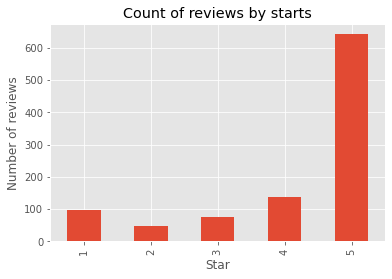

In [6]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of reviews by starts')
ax.set_xlabel('Star')
ax.set_ylabel('Number of reviews')
plt.show()

In [7]:
example = df['Text'][50]
print(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [8]:
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [9]:
# Because we are using a Notebook we need to store the result in a variable then use pretty print method to display
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I am excited to say that I did not like it')

{'neg': 0.183, 'neu': 0.608, 'pos': 0.209, 'compound': 0.0747}

In [11]:
# calculate the polarity score on the entire dataset
# the value Id from original dataset is used as dictionary keys for future merge with original dataset
res = {}
for _, row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [13]:
# the reason for renaming the index column in the vaders dataframe is to be able to merge it with our 
# original dataframe on the common key Id

vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


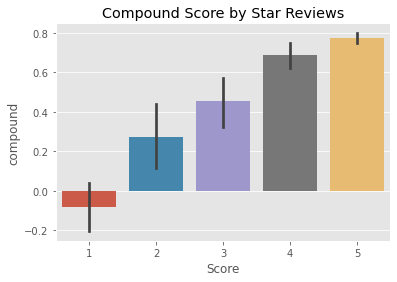

In [14]:
ax = sns.barplot(data = vaders, x='Score', y = 'compound')
ax.set_title('Compound Score by Star Reviews')
plt.show()

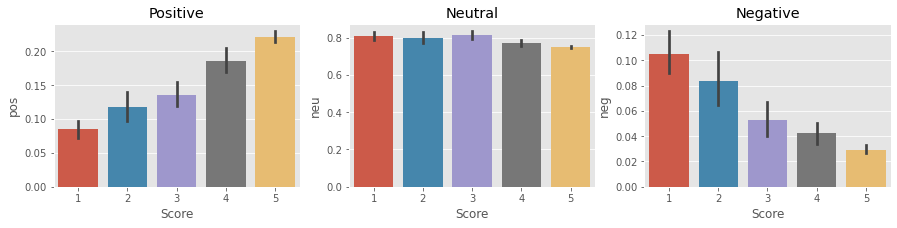

In [15]:
# build a 1 by 3 grid of subplots to illustrate further insights

fig, axs = plt.subplots(1,3,figsize = (15,3))
sns.barplot(data = vaders, x= 'Score', y ='pos', ax = axs[0])
sns.barplot(data = vaders, x= 'Score', y ='neu', ax = axs[1])
sns.barplot(data = vaders, x= 'Score', y ='neg', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
# plt.tight_layout()
plt.show()

In [16]:
# up until this point words in a sentence were individually investigated but human language is more complex than that
# we want to use more robust models to incorporate the intricacies of the language more
#  for example if someone said "It was terribly good" the model would pick up the relationship among words.


from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer =AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)






In [17]:
# review of our vader model for a sample review and respective scores

print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [18]:
# Run the same review on roberta model from huggingface

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
# change the output from a tensor to a numpy array
scores = output[0][0].detach().numpy()
print(f"scores array raw is {scores}")
# apply softmax to the scores numpy array
scores = softmax(scores)
print(f"scores array after softmax applied is {scores}")

scores array raw is [ 3.1436293  -0.71066874 -2.6558964 ]
scores array after softmax applied is [0.9763551  0.02068747 0.00295737]


In [19]:
# make a function out of what we did above to apply it to all dataset

def roberta_polarity_scores(example):
    
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {"roberta_neg": scores[0],
                  "roberta_neu": scores[1],
                  "roberta_pos": scores[2],}
    return scores_dict

In [20]:
# make a function that returns vader result in proper format so to be comparable with roberta results

def vader_polarity_scores(example):
    result = sia.polarity_scores(example)
    vader_result = {}
    
    for key, value in result.items():
        vader_result[f"vader_{key}"] = value
    return vader_result    
        

In [21]:
# running both models for each review in dataset
# as so it happens a bunch of reviews are tough for roberta model to handle because of their lenght
# therefore a try-catch statement is added

res = {}
for _, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        roberta_result = roberta_polarity_scores(text)
        vader_result = vader_polarity_scores(text)
        both_res = {**vader_result, ** roberta_result}
        res[myid] = both_res # this will be added to the original dataframe using the key "Id"
    except RuntimeError:
        print(f"roberta could not handle review with id {myid}")

  0%|          | 0/1000 [00:00<?, ?it/s]

roberta could not handle review with id 83
roberta could not handle review with id 187
roberta could not handle review with id 529
roberta could not handle review with id 540
roberta could not handle review with id 746
roberta could not handle review with id 863


In [22]:
# merging the sentiment analysis results from trained models with original dataframe

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how = 'left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


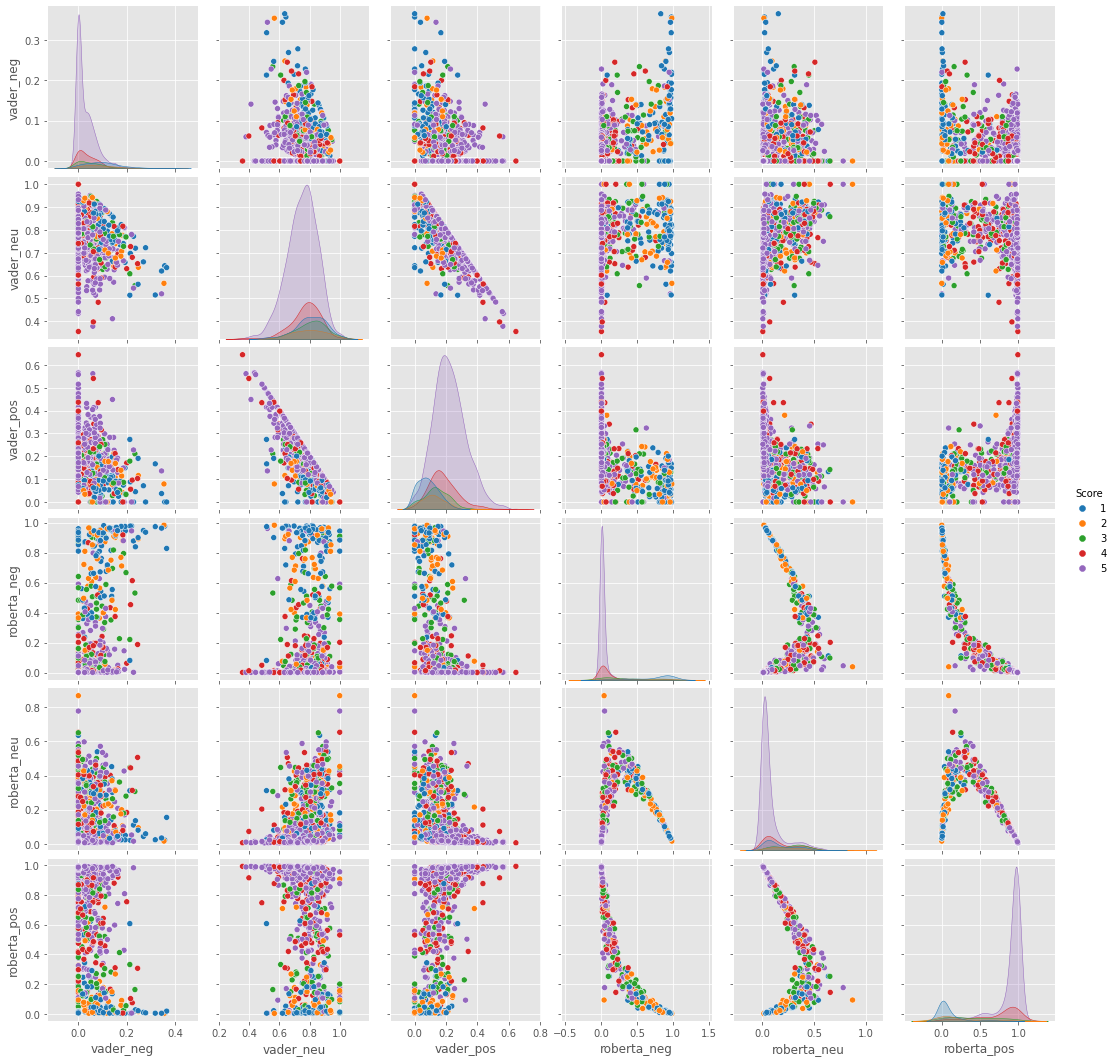

In [23]:
# paiplot enables us to see the comparison between observations and extracted features

# results_df.columns

sns.pairplot(data = results_df,
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'Score',
             palette = 'tab10' )
plt.show()

In [39]:
# these are some sample reviews that were actually 1 star so bad reviews but were percievied by roberta model as positive
# so we count them as false positive

roberta_false_positive = results_df.query('Score == 1').sort_values('roberta_pos',ascending = False)

for i in range(5):
    print(roberta_false_positive.iloc[i]['Text'])
    print("-"*30)

I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months.
------------------------------
If it were possible to give this product zero stars, I would have done so.  I am a huge fan of Twinings teas, and was very excited to try this new blend.  After arriving home from the grocery, I immediately started the kettle to enjoy a cup while prepping dinner.  Between sorting, washing, and chopping items, the hot water was added to the bag to steep.  Preparation continued, until a distinctly off odor hit me.  I thought one of my ingredients must be rancid!  I hunted around for almost four minutes before I realized it was the tea.  Even after cleaning up, and airing out the kitchen, my roommate later came in and